<a href="https://colab.research.google.com/github/NishmithaJR/Data-Analytics-Project/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Zomato data.csv", nrows=1000)
df

/tmp/ipython-input-37-4028177142.py:1: DtypeWarning: Columns (350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,58

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,Unnamed: 4150,Unnamed: 4151,Unnamed: 4152,Unnamed: 4153,Unnamed: 4154,Unnamed: 4155,Unnamed: 4156,Unnamed: 4157,Unnamed: 4158,Unnamed: 4159
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.zomato.com/bangalore/andhra-kitche...,"EK Retail Building, Beside Vijaya Bank, Vijaya...",Andhra Kitchen,Yes,No,3.9/5,158,+91 8197977737,Bannerghatta Road,"Takeaway, Delivery",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,https://www.zomato.com/bangalore/veg-by-nature...,"1260, SY 35/4, SJR Tower's, 7th Phase, 24th Ma...",Veg By Nature,Yes,No,3.4/5,14,080 43334321,JP Nagar,"Takeaway, Delivery",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,https://www.zomato.com/bangalore/fattoush-bann...,"128/54/10, First floor, Opposite IIM - B, Dasa...",Fattoush,Yes,Yes,4.2/5,1964,080 41425553\r\r\n+91 7337830044,Bannerghatta Road,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,e a spread of desserts and coffees.'),('Rated 5.0','RATED\n After reading a lot of reviews,i finally decided to try this place.\nThis tu...,salads both veg and non veg. The starters has...,('Rated 4.0',"""""RATED\n Hello everyone!! I had been to Fat...",passion mojito,Virgin mojito. The mango lady and passion moj...,ozzy chicken are top notch.\nAnd the Arab swe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**How many restaurants have got more than 3 ratings?**

In [ ]:
# Clean and convert 'rate' column to numeric
# Extract the numeric part before the '/' and convert to float
df['rate'] = df['rate'].astype(str).str.split('/').str[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows where 'rate' is NaN after conversion (due to invalid original values)
df_clean_rate = df.dropna(subset=['rate'])

# Filter restaurants with rating > 3
filtered_df = df_clean_rate[df_clean_rate['rate'] > 3]

# Count how many such restaurants
count = filtered_df.shape[0]

print("Number of restaurants with rating greater than 3:", count)

Number of restaurants with rating greater than 3: 761


/tmp/ipython-input-39-1743900210.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rating_counts, x='Rating Category', y='Count', palette='pastel')


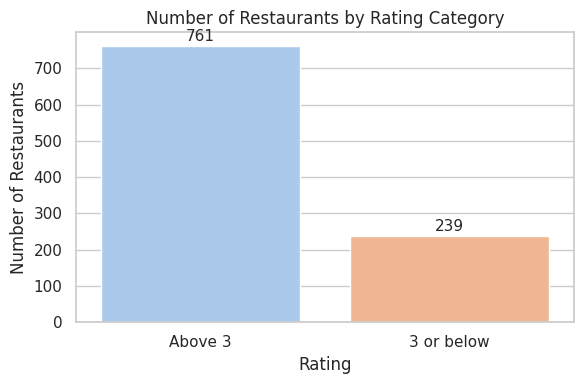

In [ ]:
# Create a new column to classify based on rating
df['rating_category'] = df['rate'].apply(lambda x: 'Above 3' if x > 3 else '3 or below')

# Count the number of restaurants in each category
rating_counts = df['rating_category'].value_counts().reset_index()
rating_counts.columns = ['Rating Category', 'Count']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=rating_counts, x='Rating Category', y='Count', palette='pastel')

# Add count labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 5, int(height),
            ha='center', va='bottom', fontsize=11)

plt.title('Number of Restaurants by Rating Category')
plt.ylabel('Number of Restaurants')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

**Which restaurant has got highest votes?**

In [ ]:
# Ensure 'votes' column is numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Drop rows where 'votes' is NaN
df = df.dropna(subset=['votes'])

# Sort by votes in descending order and get the top restaurant
top_voted_restaurant = df.sort_values(by='votes', ascending=False).head(1)

# Display the restaurant's name and vote count
restaurant_name = top_voted_restaurant['name'].values[0]
vote_count = int(top_voted_restaurant['votes'].values[0])

print(f"The restaurant with the highest votes is '{restaurant_name}' with {vote_count} votes.")

The restaurant with the highest votes is 'Empire Restaurant' with 4884 votes.


/tmp/ipython-input-41-3641673410.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[vote_count], y=[restaurant_name], palette='rocket')


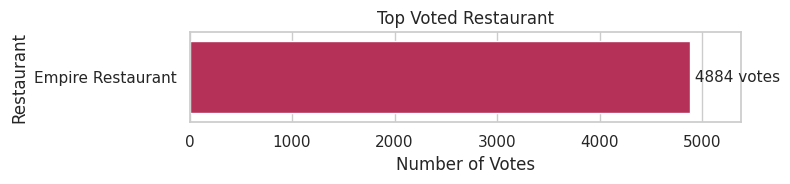

In [ ]:
# Get top restaurant
top_voted_restaurant = df.sort_values(by='votes', ascending=False).head(1)
restaurant_name = top_voted_restaurant['name'].values[0]
vote_count = int(top_voted_restaurant['votes'].values[0])

# Plotting
plt.figure(figsize=(8, 2))
sns.barplot(x=[vote_count], y=[restaurant_name], palette='rocket')

plt.title('Top Voted Restaurant')
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant')
plt.xlim(0, vote_count + 500)  # add a buffer for visual spacing

# Show vote count on the bar
plt.text(vote_count, restaurant_name, f' {vote_count} votes', va='center', ha='left', fontsize=11)

plt.tight_layout()
plt.show()

**Which restaurant has more number of cuisines?**

In [ ]:
# Drop rows with missing data
df = df.dropna(subset=['cuisines', 'name'])

# Count number of cuisines
df['cuisine_count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))

# Find the maximum cuisine count
max_cuisine_count = df['cuisine_count'].max()

# Filter all restaurants with that count
top_cuisine_restaurants = df[df['cuisine_count'] == max_cuisine_count]

# Show the result
print(f"Restaurants with the most cuisines ({max_cuisine_count} cuisines):")
print(top_cuisine_restaurants[['name', 'cuisines', 'cuisine_count']])

Restaurants with the most cuisines (8 cuisines):
                  name                                           cuisines  \
60           FreshMenu  Healthy Food, Chinese, Biryani, North Indian, ...   
203        Olive - Era  BBQ, Arabian, Rolls, Chinese, North Indian, Ju...   
892           Fattoush  Arabian, Biryani, Chinese, Middle Eastern, Fas...   
930   Healthy Smoothie  American, Bakery, Beverages, Cafe, Healthy Foo...   
976  Kitchens@JP Nagar  Biryani, Kerala, Mughlai, Street Food, North I...   
987          FreshMenu  Healthy Food, Chinese, Biryani, North Indian, ...   
997           Fattoush  Arabian, Biryani, Chinese, Middle Eastern, Fas...   

     cuisine_count  
60               8  
203              8  
892              8  
930              8  
976              8  
987              8  
997              8  


/tmp/ipython-input-42-938969664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisine_count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))


/tmp/ipython-input-43-1140750329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cuisine_restaurants, x='cuisine_count', y='unique_label', palette='rocket')
/tmp/ipython-input-43-1140750329.py:17: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


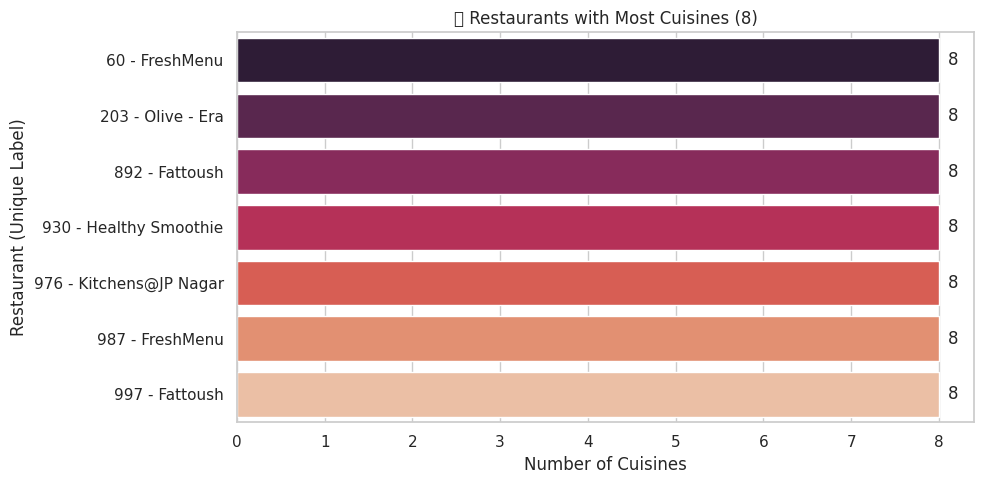

In [ ]:
# Option 1: Use index to make the label unique
top_cuisine_restaurants = df[df['cuisine_count'] == df['cuisine_count'].max()].copy()
top_cuisine_restaurants['unique_label'] = top_cuisine_restaurants.index.astype(str) + ' - ' + top_cuisine_restaurants['name']

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=top_cuisine_restaurants, x='cuisine_count', y='unique_label', palette='rocket')

plt.title(f'🍽️ Restaurants with Most Cuisines ({df["cuisine_count"].max()})')
plt.xlabel('Number of Cuisines')
plt.ylabel('Restaurant (Unique Label)')

# Add count labels
for index, row in top_cuisine_restaurants.iterrows():
    plt.text(row['cuisine_count'] + 0.1, row['unique_label'], int(row['cuisine_count']), va='center')

plt.tight_layout()
plt.show()

**Which type of restaurant do people prefer the most?**

/tmp/ipython-input-44-1084319597.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_type_counts, x='Restaurant Type', y='Count', palette='viridis')


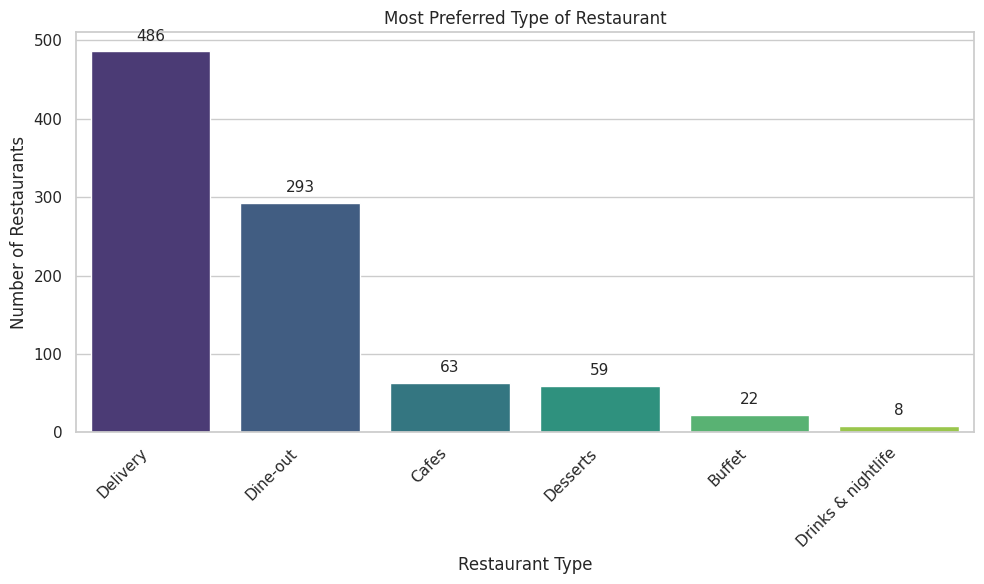

In [ ]:
# Drop rows with missing 'type' (if any)
# Changed 'type' to 'listed_in(type)' as this is the correct column name from previous usage
df = df.dropna(subset=['listed_in(type)'])

# Count the frequency of each type
restaurant_type_counts = df['listed_in(type)'].value_counts().reset_index()
restaurant_type_counts.columns = ['Restaurant Type', 'Count']

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=restaurant_type_counts, x='Restaurant Type', y='Count', palette='viridis')

plt.title('Most Preferred Type of Restaurant')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Add count labels on bars
for index, row in restaurant_type_counts.iterrows():
    plt.text(index, row['Count'] + 10, int(row['Count']), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

**In which restaurant the approximate cost for two people is less expensive?**

In [ ]:
print(df.columns.tolist())
# Clean the cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Drop rows with missing values in cost or name
df_clean = df.dropna(subset=['approx_cost(for two people)', 'name'])

# Find the restaurant with the lowest cost
cheapest = df_clean.sort_values(by='approx_cost(for two people)', ascending=True).head(1)

# Display result
restaurant_name = cheapest['name'].values[0]
cost = cheapest['approx_cost(for two people)'].values[0]

print(f"The cheapest restaurant is '{restaurant_name}' with an approximate cost for two people of ₹{int(cost)}.")

['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Un

/tmp/ipython-input-46-3366578356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cheapest, x='approx_cost(for two people)', y='name', palette='Greens_r')
/tmp/ipython-input-46-3366578356.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


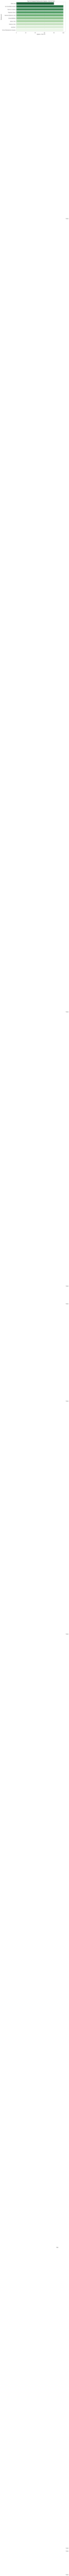

In [ ]:
# Get top 10 cheapest restaurants
top_cheapest = df_clean.sort_values(by='approx_cost(for two people)', ascending=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cheapest, x='approx_cost(for two people)', y='name', palette='Greens_r')

plt.title('Top 10 Cheapest Restaurants (Approx. Cost for Two)')
plt.xlabel('Approx. Cost (₹)')
plt.ylabel('Restaurant')

# Add labels
for index, row in top_cheapest.iterrows():
    plt.text(row['approx_cost(for two people)'] + 5, index, f"₹{int(row['approx_cost(for two people)'])}", va='center')

plt.tight_layout()
plt.show()